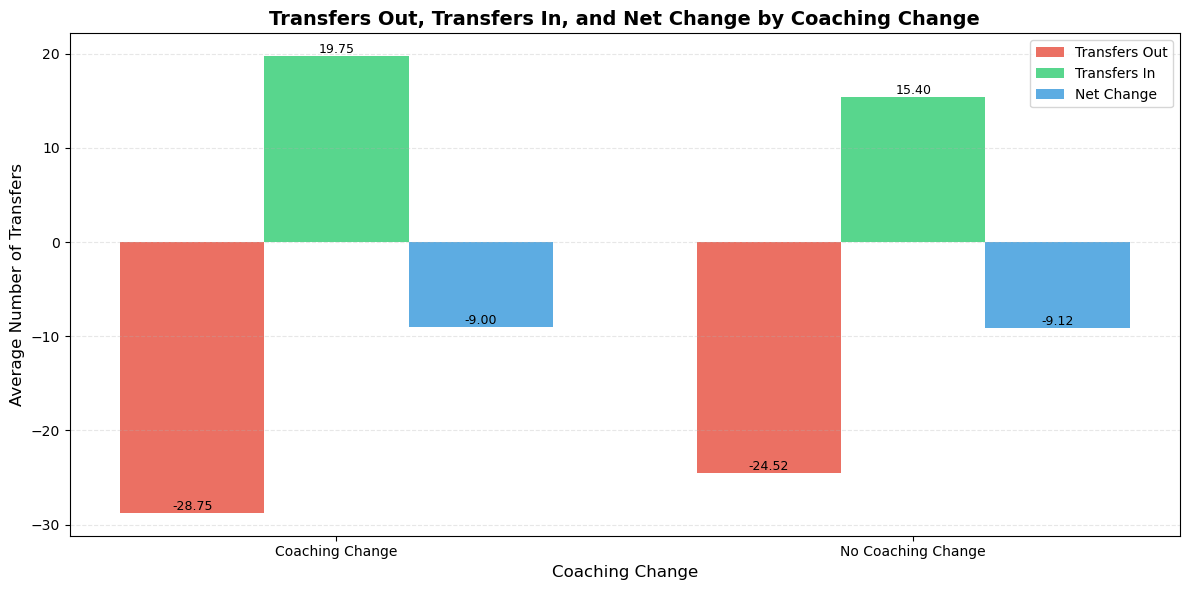

In [20]:
# Visualize Transfers out, in and net change vs Coaching Change in the years 2022-2024
# Only FBS teams are included in this analysis
# Only SEC teams are included in this analysis
# Completed by Nathan Grey
# Revised by Harrison Rubin

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')

# Read in the data

df_team_metadata = pd.read_csv('./data/processed/team_metadata.csv')

# lets only look at Classification = fbs
df_team_metadata = df_team_metadata[df_team_metadata['Classification'] == 'fbs']

# lets only look at Conference = SEC
df_team_metadata = df_team_metadata[df_team_metadata['Conference'] == 'SEC']
# Split into two dataframes based on CoachingChange
df_coaching_change = df_team_metadata[df_team_metadata['CoachingChange'] == True]
df_no_coaching_change = df_team_metadata[df_team_metadata['CoachingChange'] == False]

# Count the average number of transfers out, in and net change for each group 
df_coaching_change_out = df_coaching_change['Transfers_Out'].mean()
df_coaching_change_in = df_coaching_change['Transfers_In'].mean()
df_coaching_change_net = df_coaching_change['Net_Change'].mean()

df_no_coaching_change_out = df_no_coaching_change['Transfers_Out'].mean()
df_no_coaching_change_in = df_no_coaching_change['Transfers_In'].mean()
df_no_coaching_change_net = df_no_coaching_change['Net_Change'].mean()


# Create a grouped bar plot to compare transfers out, transfers in, and net change between the two groups
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for grouped bar chart
categories = ['Coaching Change', 'No Coaching Change']
x = np.arange(len(categories))
width = 0.25

# Create bars for each metric
# Create bars for each metric
bars1 = ax.bar(
    x - width,
    [-df_coaching_change_out, -df_no_coaching_change_out],   # Make negative
    width,
    label='Transfers Out',
    color='#e74c3c',
    alpha=0.8
)
bars2 = ax.bar(
    x,
    [df_coaching_change_in, df_no_coaching_change_in],
    width,
    label='Transfers In',
    color='#2ecc71',
    alpha=0.8
)
bars3 = ax.bar(
    x + width,
    [df_coaching_change_net, df_no_coaching_change_net],
    width,
    label='Net Change',
    color='#3498db',
    alpha=0.8
)


# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Customize the plot
ax.set_xlabel('Coaching Change', fontsize=12)
ax.set_ylabel('Average Number of Transfers', fontsize=12)
ax.set_title('Transfers Out, Transfers In, and Net Change by Coaching Change', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

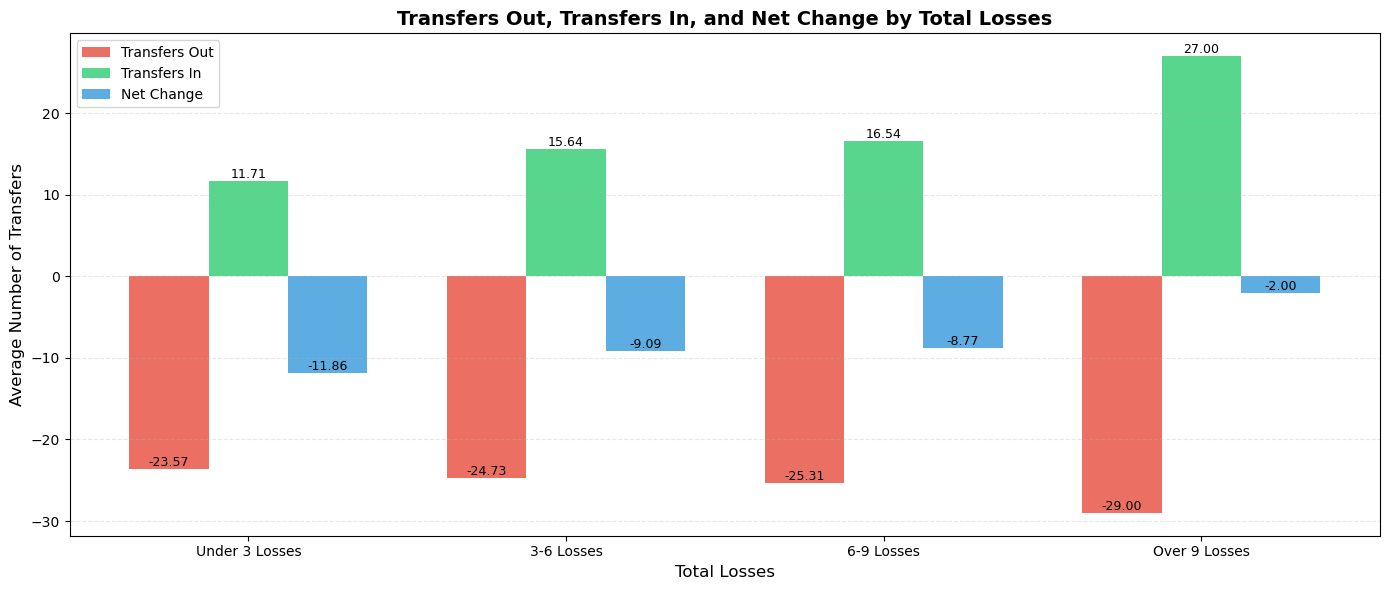

In [23]:
# Visualize Transfers out, in and net change vs total losses in the years 2022-2024
# Only FBS teams are included in this analysis
# Only SEC teams are included in this analysis
# Completed by Nathan Grey

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in the data

df_team_metadata = pd.read_csv('./data/processed/team_metadata.csv')

# lets only look at Classification = fbs
df_team_metadata = df_team_metadata[df_team_metadata['Classification'] == 'fbs']

# lets only look at Conference = SEC
df_team_metadata = df_team_metadata[df_team_metadata['Conference'] == 'SEC']

# Split into four dataframes based on losses (Under 3, 3-6, 6-9, over 9)
df_under_3 = df_team_metadata[df_team_metadata['Total Losses'] < 3]
df_3_to_6 = df_team_metadata[(df_team_metadata['Total Losses'] >= 3) & (df_team_metadata['Total Losses'] <= 6)]
df_6_to_9 = df_team_metadata[(df_team_metadata['Total Losses'] > 6) & (df_team_metadata['Total Losses'] <= 9)]
df_over_9 = df_team_metadata[df_team_metadata['Total Losses'] > 9]

# Count the average number of transfers out, in and net change for each group   
df_under_3_out = df_under_3['Transfers_Out'].mean()
df_under_3_in = df_under_3['Transfers_In'].mean()
df_under_3_net = df_under_3['Net_Change'].mean()

df_3_to_6_out = df_3_to_6['Transfers_Out'].mean()
df_3_to_6_in = df_3_to_6['Transfers_In'].mean()
df_3_to_6_net = df_3_to_6['Net_Change'].mean()

df_6_to_9_out = df_6_to_9['Transfers_Out'].mean()
df_6_to_9_in = df_6_to_9['Transfers_In'].mean()
df_6_to_9_net = df_6_to_9['Net_Change'].mean()

df_over_9_out = df_over_9['Transfers_Out'].mean()
df_over_9_in = df_over_9['Transfers_In'].mean()
df_over_9_net = df_over_9['Net_Change'].mean()

# Create a grouped bar plot to compare transfers out, transfers in, and net change between the four groups
fig, ax = plt.subplots(figsize=(14, 6))

# Prepare data for grouped bar chart
categories = ['Under 3 Losses', '3-6 Losses', '6-9 Losses', 'Over 9 Losses']
x = np.arange(len(categories))
width = 0.25

# Create bars for each metric
bars1 = ax.bar(
    x - width,
    [-df_under_3_out, -df_3_to_6_out, -df_6_to_9_out, -df_over_9_out],  # negative values
    width,
    label='Transfers Out',
    color='#e74c3c',
    alpha=0.8
)

bars2 = ax.bar(x, [df_under_3_in, df_3_to_6_in, df_6_to_9_in, df_over_9_in], width, label='Transfers In', color='#2ecc71', alpha=0.8)
bars3 = ax.bar(x + width, [df_under_3_net, df_3_to_6_net, df_6_to_9_net, df_over_9_net], width, label='Net Change', color='#3498db', alpha=0.8)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Customize the plot
ax.set_xlabel('Total Losses', fontsize=12)
ax.set_ylabel('Average Number of Transfers', fontsize=12)
ax.set_title('Transfers Out, Transfers In, and Net Change by Total Losses', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

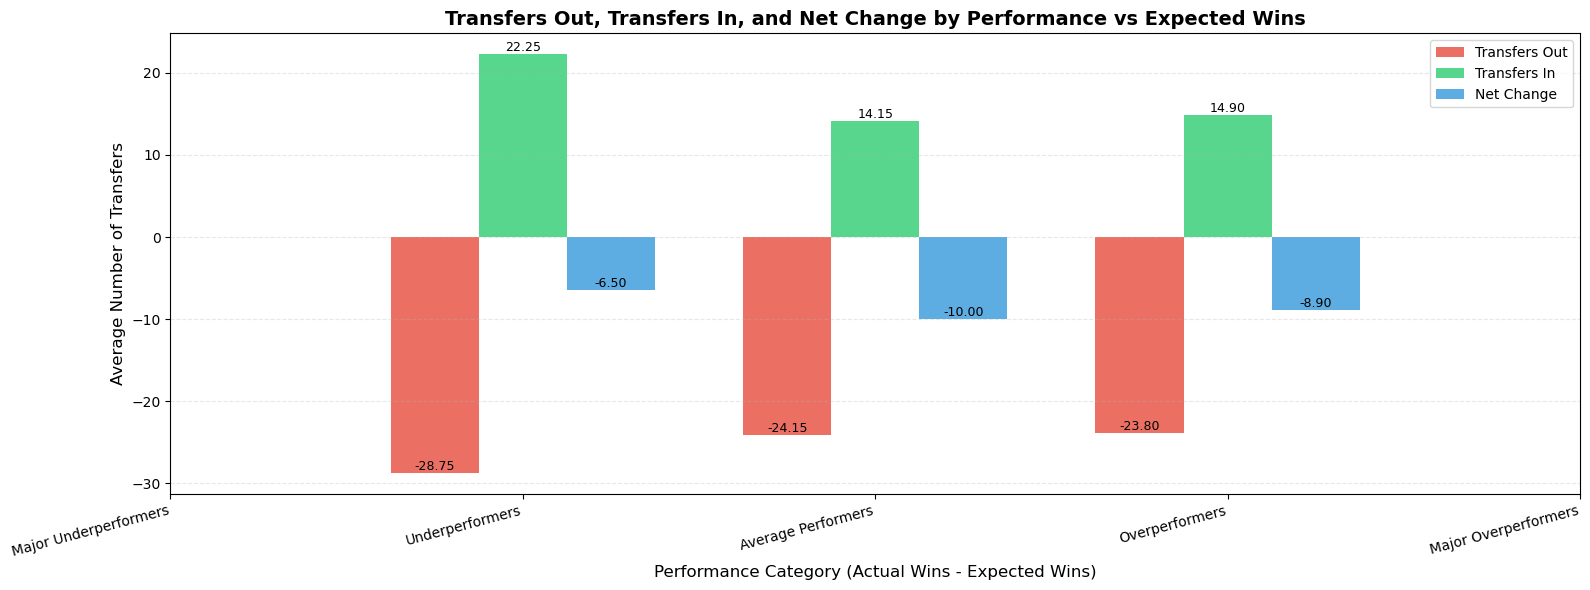

In [24]:
# Visualize Transfers out, in and net change vs difference between expected wins and actual wins in the years 2022-2024
# Only FBS teams are included in this analysis
# Only SEC teams are included in this analysis
# Completed by Nathan Grey
# Revised by Harrison Rubin

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in the data

df_team_metadata = pd.read_csv('./data/processed/team_metadata.csv')

# lets only look at Classification = fbs
df_team_metadata = df_team_metadata[df_team_metadata['Classification'] == 'fbs']

# lets only look at Conference = SEC
df_team_metadata = df_team_metadata[df_team_metadata['Conference'] == 'SEC']

# Calculate the difference between expected wins and actual wins for each team
df_team_metadata['Wins_Difference'] = df_team_metadata['Total Wins'] - df_team_metadata['ExpectedWins']

# Split into four data frames based on wins difference
# Major underperformers (Wins Difference < -3)
df_major_underperformers = df_team_metadata[df_team_metadata['Wins_Difference'] < -3]

# Underperformers (Wins Difference < -1 and > -3)
df_underperformers = df_team_metadata[(df_team_metadata['Wins_Difference'] < -1) & (df_team_metadata['Wins_Difference'] > -3)]

# Average Performers (Wins Difference < 1 and > -1)
df_average_performers = df_team_metadata[(df_team_metadata['Wins_Difference'] < 1) & (df_team_metadata['Wins_Difference'] > -1)]

# Overperformers (Wins Difference > 1 and < 3)
df_overperformers = df_team_metadata[(df_team_metadata['Wins_Difference'] > 1) & (df_team_metadata['Wins_Difference'] < 3)]

# Major overperformers (Wins Difference > 3)
df_major_overperformers = df_team_metadata[df_team_metadata['Wins_Difference'] > 3]

# Count the average number of transfers out, in and net change for each group   
df_major_underperformers_out = df_major_underperformers['Transfers_Out'].mean()
df_major_underperformers_in = df_major_underperformers['Transfers_In'].mean()
df_major_underperformers_net = df_major_underperformers['Net_Change'].mean()

df_underperformers_out = df_underperformers['Transfers_Out'].mean()
df_underperformers_in = df_underperformers['Transfers_In'].mean()
df_underperformers_net = df_underperformers['Net_Change'].mean()

df_average_performers_out = df_average_performers['Transfers_Out'].mean()
df_average_performers_in = df_average_performers['Transfers_In'].mean()
df_average_performers_net = df_average_performers['Net_Change'].mean()

df_overperformers_out = df_overperformers['Transfers_Out'].mean()
df_overperformers_in = df_overperformers['Transfers_In'].mean()
df_overperformers_net = df_overperformers['Net_Change'].mean()

df_major_overperformers_out = df_major_overperformers['Transfers_Out'].mean()
df_major_overperformers_in = df_major_overperformers['Transfers_In'].mean()
df_major_overperformers_net = df_major_overperformers['Net_Change'].mean()

# Create a grouped bar plot to compare transfers out, transfers in, and net change between the five groups
fig, ax = plt.subplots(figsize=(16, 6))

# Prepare data for grouped bar chart
categories = ['Major Underperformers', 'Underperformers', 'Average Performers', 'Overperformers', 'Major Overperformers']
x = np.arange(len(categories))
width = 0.25

# Create bars for each metric
bars1 = ax.bar(
    x - width,
    [-df_major_underperformers_out, -df_underperformers_out, -df_average_performers_out, -df_overperformers_out, -df_major_overperformers_out],
    width,
    label='Transfers Out',
    color='#e74c3c',
    alpha=0.8
)
bars2 = ax.bar(x, [df_major_underperformers_in, df_underperformers_in, df_average_performers_in, df_overperformers_in, df_major_overperformers_in], width, label='Transfers In', color='#2ecc71', alpha=0.8)
bars3 = ax.bar(x + width, [df_major_underperformers_net, df_underperformers_net, df_average_performers_net, df_overperformers_net, df_major_overperformers_net], width, label='Net Change', color='#3498db', alpha=0.8)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Customize the plot
ax.set_xlabel('Performance Category (Actual Wins - Expected Wins)', fontsize=12)
ax.set_ylabel('Average Number of Transfers', fontsize=12)
ax.set_title('Transfers Out, Transfers In, and Net Change by Performance vs Expected Wins', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=15, ha='right')
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()



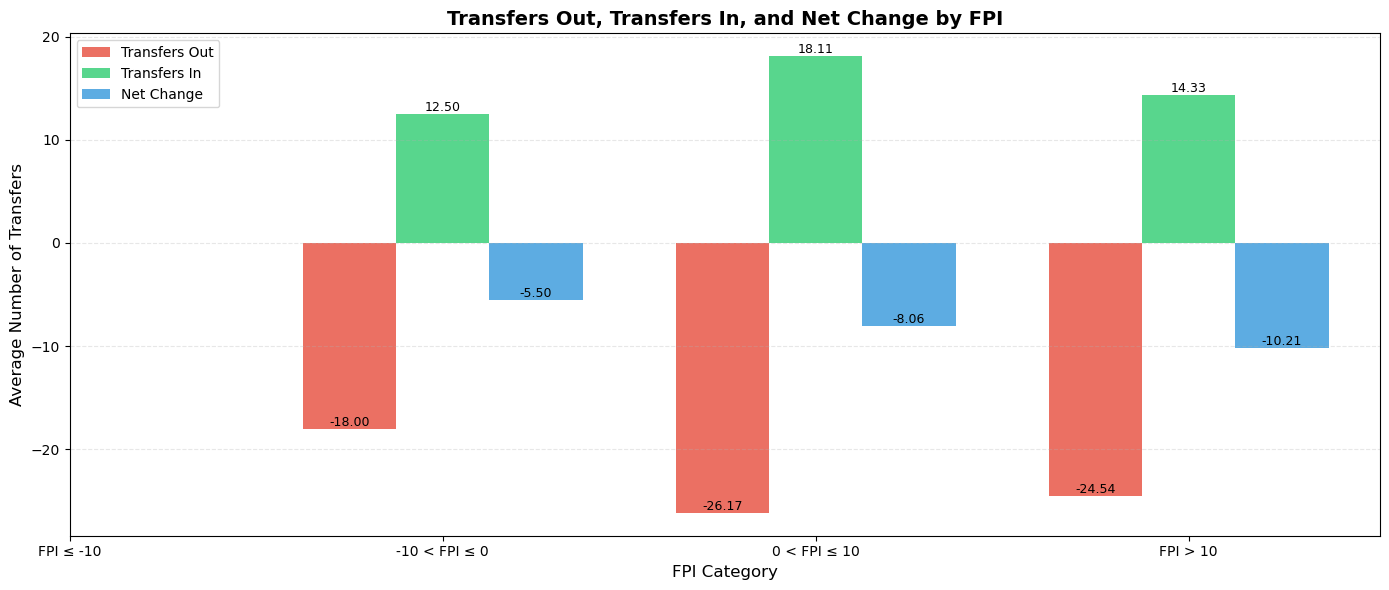

In [35]:
# Visualize Transfers out, in and net change vs fpi in the years 2022-2024
# Only FBS teams are included in this analysis
# Only SEC teams are included in this analysis
# Completed by Nathan Grey

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in the data

df_team_metadata = pd.read_csv('./data/processed/team_metadata.csv')

# lets only look at Classification = fbs
df_team_metadata = df_team_metadata[df_team_metadata['Classification'] == 'fbs']

# lets only look at Conference = SEC
df_team_metadata = df_team_metadata[df_team_metadata['Conference'] == 'SEC']

# Split into four data frames based on fpi
# -10 or worse
df_fpi_under_10 = df_team_metadata[df_team_metadata['Fpi'] <= -10]

# -10 to 0
df_fpi_10_to_0 = df_team_metadata[(df_team_metadata['Fpi'] > -10) & (df_team_metadata['Fpi'] <= 0)]

# 0 to 10
df_fpi_0_to_10 = df_team_metadata[(df_team_metadata['Fpi'] > 0) & (df_team_metadata['Fpi'] <= 10)]

# 10 or better
df_fpi_10_or_better = df_team_metadata[df_team_metadata['Fpi'] > 10]

# Count the average number of transfers out, in and net change for each group   
df_fpi_under_10_out = df_fpi_under_10['Transfers_Out'].mean()
df_fpi_under_10_in = df_fpi_under_10['Transfers_In'].mean()
df_fpi_under_10_net = df_fpi_under_10['Net_Change'].mean()

df_fpi_10_to_0_out = df_fpi_10_to_0['Transfers_Out'].mean() 
df_fpi_10_to_0_in = df_fpi_10_to_0['Transfers_In'].mean()
df_fpi_10_to_0_net = df_fpi_10_to_0['Net_Change'].mean()

df_fpi_0_to_10_out = df_fpi_0_to_10['Transfers_Out'].mean()
df_fpi_0_to_10_in = df_fpi_0_to_10['Transfers_In'].mean()
df_fpi_0_to_10_net = df_fpi_0_to_10['Net_Change'].mean()

df_fpi_10_or_better_out = df_fpi_10_or_better['Transfers_Out'].mean()
df_fpi_10_or_better_in = df_fpi_10_or_better['Transfers_In'].mean()
df_fpi_10_or_better_net = df_fpi_10_or_better['Net_Change'].mean()

# Create a grouped bar plot to compare transfers out, transfers in, and net change between the four groups
fig, ax = plt.subplots(figsize=(14, 6))

# Prepare data for grouped bar chart
categories = ['FPI ≤ -10', '-10 < FPI ≤ 0', '0 < FPI ≤ 10', 'FPI > 10']
x = np.arange(len(categories))
width = 0.25

# Create bars for each metric
bars1 = ax.bar(
    x - width,
    [-df_fpi_under_10_out,
     -df_fpi_10_to_0_out,
     -df_fpi_0_to_10_out,
     -df_fpi_10_or_better_out],
    width,
    label='Transfers Out',
    color='#e74c3c',
    alpha=0.8
)

bars2 = ax.bar(x, [df_fpi_under_10_in, df_fpi_10_to_0_in, df_fpi_0_to_10_in, df_fpi_10_or_better_in], width, label='Transfers In', color='#2ecc71', alpha=0.8)
bars3 = ax.bar(x + width, [df_fpi_under_10_net, df_fpi_10_to_0_net, df_fpi_0_to_10_net, df_fpi_10_or_better_net], width, label='Net Change', color='#3498db', alpha=0.8)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Customize the plot
ax.set_xlabel('FPI Category', fontsize=12)
ax.set_ylabel('Average Number of Transfers', fontsize=12)
ax.set_title('Transfers Out, Transfers In, and Net Change by FPI', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()



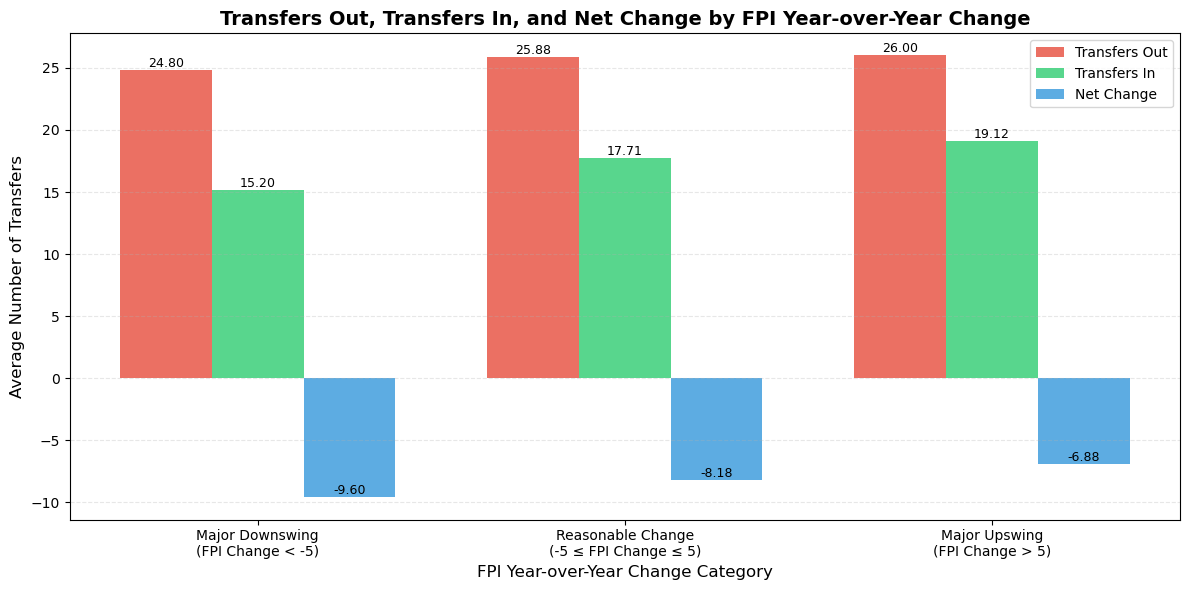

In [31]:
# Visualize Transfers out, in and net change vs fpi difference in the years 2022-2024
# Only FBS teams are included in this analysis
# Only SEC teams are included in this analysis
# Completed by Nathan Grey
# Revised by Harrison Rubin

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in the data

df_team_metadata = pd.read_csv('./data/processed/team_metadata.csv')

# lets only look at Classification = fbs
df_team_metadata = df_team_metadata[df_team_metadata['Classification'] == 'fbs']

# lets only look at Conference = SEC
df_team_metadata = df_team_metadata[df_team_metadata['Conference'] == 'SEC']

# Split into four data frames based on Fpi_yoy_change
# Major downswing
df_fpi_yoy_change_under_5 = df_team_metadata[df_team_metadata['Fpi_yoy_change'] < -5]
# Reasonable change
df_fpi_yoy_change_5_to_5 = df_team_metadata[(df_team_metadata['Fpi_yoy_change'] >= -5) & (df_team_metadata['Fpi_yoy_change'] <= 5)]
# Major upswing
df_fpi_yoy_change_over_5 = df_team_metadata[df_team_metadata['Fpi_yoy_change'] > 5]

# Count the average number of transfers out, in and net change for each group   
df_fpi_yoy_change_under_5_out = df_fpi_yoy_change_under_5['Transfers_Out'].mean()
df_fpi_yoy_change_under_5_in = df_fpi_yoy_change_under_5['Transfers_In'].mean()
df_fpi_yoy_change_under_5_net = df_fpi_yoy_change_under_5['Net_Change'].mean()

df_fpi_yoy_change_5_to_5_out = df_fpi_yoy_change_5_to_5['Transfers_Out'].mean()
df_fpi_yoy_change_5_to_5_in = df_fpi_yoy_change_5_to_5['Transfers_In'].mean()
df_fpi_yoy_change_5_to_5_net = df_fpi_yoy_change_5_to_5['Net_Change'].mean()

df_fpi_yoy_change_over_5_out = df_fpi_yoy_change_over_5['Transfers_Out'].mean()
df_fpi_yoy_change_over_5_in = df_fpi_yoy_change_over_5['Transfers_In'].mean()
df_fpi_yoy_change_over_5_net = df_fpi_yoy_change_over_5['Net_Change'].mean()

# Create a grouped bar plot to compare transfers out, transfers in, and net change between the three groups
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for grouped bar chart
categories = ['Major Downswing\n(FPI Change < -5)', 'Reasonable Change\n(-5 ≤ FPI Change ≤ 5)', 'Major Upswing\n(FPI Change > 5)']
x = np.arange(len(categories))
width = 0.25

# Create bars for each metric
bars1 = ax.bar(x - width, [df_fpi_yoy_change_under_5_out, df_fpi_yoy_change_5_to_5_out, df_fpi_yoy_change_over_5_out], width, label='Transfers Out', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x, [df_fpi_yoy_change_under_5_in, df_fpi_yoy_change_5_to_5_in, df_fpi_yoy_change_over_5_in], width, label='Transfers In', color='#2ecc71', alpha=0.8)
bars3 = ax.bar(x + width, [df_fpi_yoy_change_under_5_net, df_fpi_yoy_change_5_to_5_net, df_fpi_yoy_change_over_5_net], width, label='Net Change', color='#3498db', alpha=0.8)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Customize the plot
ax.set_xlabel('FPI Year-over-Year Change Category', fontsize=12)
ax.set_ylabel('Average Number of Transfers', fontsize=12)
ax.set_title('Transfers Out, Transfers In, and Net Change by FPI Year-over-Year Change', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

